# グラフ作成・検定

## データの用意（ここから）

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import kruskal
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
plt.rcParams['font.family'] = "MS Gothic"
plt.rcParams["font.size"] = 15

from matplotlib import rc
rc('font',**{'family':'serif','serif':["MS Gothic"]})
plt.rcParams['pdf.fonttype'] = 42

# df = pd.read_csv('../data/2023result01.csv')
df = pd.read_csv('../data/psakujo.csv')
df_im = pd.read_csv('../data/im_check.csv')
dfq = pd.read_csv("../data/que.csv")
df_m = pd.read_csv("../data/df_move.csv")

In [ ]:
df = df.dropna()
df["au_poi"] = df["au_poi"]-1
df_im = df_im.dropna()
df_im = df_im.rename(columns={'ty_ch': 'ty_unch', 'au_ch': 'au_unch', 'ci_ch': 'ci_unch'})
df_im["ty_ch"] = 13-df_im["ty_unch"]
df_im["au_ch"] = 13-df_im["au_unch"]
df_im["ci_ch"] = 10-df_im["ci_unch"]
# df_im = df_im.reindex(columns={'num', 'ty_ch', 'au_ch', 'ci_ch', 'ty_unch', 'au_unch', 'ci_unch'})
df_m = df_m.dropna()
df_im.loc[23] = df_im.iloc[21]
df_im = df_im.drop(21)
df_im

In [3]:
df_1 = df[df["ty_num"]==1]
df_2 = df[df["ty_num"]==2]
df_3 = df[df["ty_num"]==3]
df_4 = df[df["ty_num"]==4]

In [4]:
df["au_num_ty"] = 0
df["ci_num_ty"] = 0
for i in range(len(df)+2):
    if i == 21 or i == 22:
        continue
    if df["au_num"][i] == 5:
        df["au_num_ty"].loc[i] = 1
    elif df["au_num"][i] == 6:
        df["au_num_ty"].loc[i] = 2
    elif df["au_num"][i] == 7:
        df["au_num_ty"].loc[i] = 3
    elif df["au_num"][i] == 8:
        df["au_num_ty"].loc[i] = 4
    
    if df["ci_num"][i] == 9:
        df["ci_num_ty"].loc[i] = 1
    elif df["ci_num"][i] == 10:
        df["ci_num_ty"].loc[i] = 2
    elif df["ci_num"][i] == 11:
        df["ci_num_ty"].loc[i] = 3
    elif df["ci_num"][i] == 12:
        df["ci_num_ty"].loc[i] = 4

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [5]:
df_11 = df_1.rename(columns={"ty_num":"num", "au_num":"num", "ci_num":"num", 'ty_poi': '1poi', 'ty_look': '1look', 'ty_move': '1move', 'au_poi': '2poi', 'au_look': '2look', 'au_move': '2move', 'ci_poi': '3poi', 'ci_look': '3look', 'ci_move': '3move'})
df_1_1 = df_11[["1poi", "1look", "1move"]].reset_index(drop=True)
df_1_2 = df_11[["2poi", "2look", "2move"]].reset_index(drop=True)
df_1_3 = df_11[["3poi", "3look", "3move"]].reset_index(drop=True)
df_22 = df_2.rename(columns={"ty_num":"num", "au_num":"num", "ci_num":"num", 'ty_poi': '2poi', 'ty_look': '2look', 'ty_move': '2move', 'au_poi': '3poi', 'au_look': '3look', 'au_move': '3move', 'ci_poi': '4poi', 'ci_look': '4look', 'ci_move': '4move'})
df_2_2 = df_22[["2poi", "2look", "2move"]].reset_index(drop=True)
df_2_3 = df_22[["3poi", "3look", "3move"]].reset_index(drop=True)
df_2_4 = df_22[["4poi", "4look", "4move"]].reset_index(drop=True)
df_33 = df_3.rename(columns={"ty_num":"num", "au_num":"num", "ci_num":"num", 'ty_poi': '3poi', 'ty_look': '3look', 'ty_move': '3move', 'au_poi': '4poi', 'au_look': '4look', 'au_move': '4move', 'ci_poi': '1poi', 'ci_look': '1look', 'ci_move': '1move'})
df_3_3 = df_33[["3poi", "3look", "3move"]].reset_index(drop=True)
df_3_4 = df_33[["4poi", "4look", "4move"]].reset_index(drop=True)
df_3_1 = df_33[["1poi", "1look", "1move"]].reset_index(drop=True)
df_44 = df_4.rename(columns={"ty_num":"num", "au_num":"num", "ci_num":"num", 'ty_poi': '4poi', 'ty_look': '4look', 'ty_move': '4move', 'au_poi': '1poi', 'au_look': '1look', 'au_move': '1move', 'ci_poi': '2poi', 'ci_look': '2look', 'ci_move': '2move'})
df_4_4 = df_44[["4poi", "4look", "4move"]].reset_index(drop=True)
df_4_1 = df_44[["1poi", "1look", "1move"]].reset_index(drop=True)
df_4_2 = df_44[["2poi", "2look", "2move"]].reset_index(drop=True)
df_22

,user,num,2poi,2look,2move,num,3poi,3look,3move,num,4poi,4look,4move
1,2,2,4.0,1.16,15.0,7,5.0,3.74,22.0,12,9.0,1.00,7.0
5,6,2,4.0,4.14,19.0,7,3.0,5.21,21.0,12,10.0,7.92,19.0
9,10,2,5.0,1.53,19.0,7,4.0,2.25,25.0,12,4.0,3.54,32.0
13,14,2,4.0,7.56,42.0,7,5.0,9.89,48.0,12,8.0,7.97,49.0
17,18,2,4.0,2.84,16.0,7,4.0,1.92,21.0,12,6.0,5.23,35.0


## データの用意（ここまで）

## グラフ

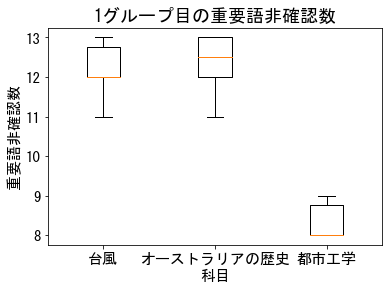

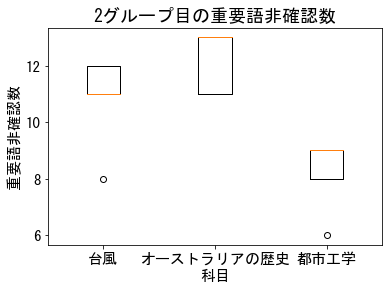

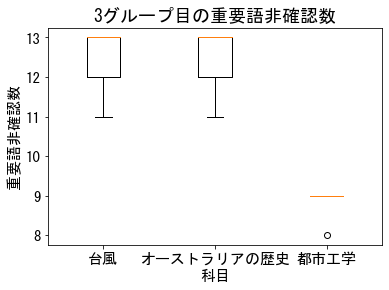

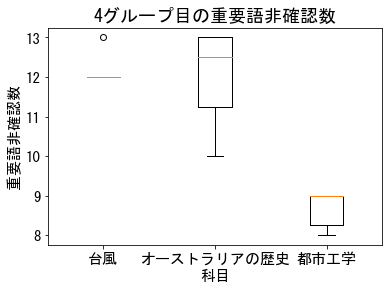

In [5]:
# 重要語の箱ひげ図
for x in range(4):
    imn = x+1
    dftyim = df_im[df_im["num"]==imn]["ty_ch"]
    dfauim = df_im[df_im["num"]==imn]["au_ch"]
    dfciim = df_im[df_im["num"]==imn]["ci_ch"]
    plt.boxplot([dftyim, dfauim, dfciim], labels=["台風", "オーストラリアの歴史", "都市工学"])
    plt.xlabel("科目")
    plt.ylabel("重要語非確認数")
    plt.title(f"{imn}グループ目の重要語非確認数")
    plt.show()

In [10]:
# print(imex[imex["f_or_s"]==1])
# imfaex[imfaex["f_or_s"]==1]
# autoex[autoex["f_or_s"]==1]

## 説明用グラフの作成（ここから）

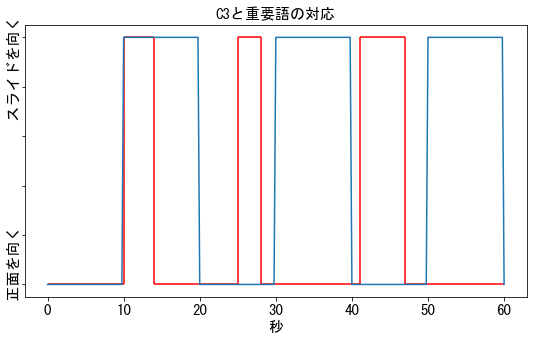

In [8]:
autoex = pd.read_csv('../data/一定例.csv')
fig = plt.figure(figsize=(9, 5))
plt.plot(autoex["seconds"], autoex["f_or_s"], label="(C3)")
plt.xlabel("秒")
plt.ylabel(" 正面を向く　　　　　　　スライドを向く")
plt.title("C3と重要語の対応", fontsize=15)
plt.tick_params(labelleft=False)
# plt.legend()

# 重要語
plt.hlines(0, 0, 10, color="r")# y, x, x
plt.vlines(10, 0, 1, color="r")# x, y, y
plt.hlines(1, 10, 14, color="r")# y, x, x
plt.vlines(14, 0, 1, color="r")# x, y, y
plt.hlines(0, 14, 25, color="r")# y, x, x
plt.vlines(25, 0, 1, color="r")# x, y, y
plt.hlines(1, 25, 28, color="r")# y, x, x
plt.vlines(28, 0, 1, color="r")# x, y, y
plt.hlines(0, 28, 41, color="r")# y, x, x
plt.vlines(41, 0, 1, color="r")# x, y, y
plt.hlines(1, 41, 47, color="r")# y, x, x
plt.vlines(47, 0, 1, color="r")# x, y, y
plt.hlines(0, 47, 60, color="r")# y, x, x
# plt.savefig("../data/グラフ類/vsc3.jpg")
plt.show()

In [9]:
# imex = pd.read_csv('../data/重要語例.csv')
# plt.plot(imex["seconds"], imex["f_or_s"])
# plt.xlabel("秒")
# plt.ylabel("　←非重要語説明　　　　　　重要語説明→")
# plt.title("重要語の説明")
# # plt.savefig("../data/グラフ類/重要語例.jpg")
# plt.show()

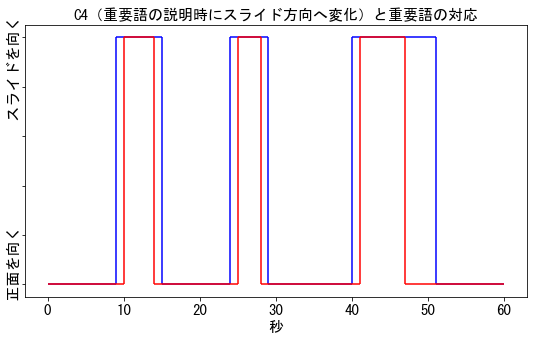

In [3]:
imfaex = pd.read_csv('../data/重要語顔例.csv')
fig = plt.figure(figsize=(9, 5))
# plt.plot(imfaex["seconds"], imfaex["f_or_s"])
plt.xlabel("秒")
plt.ylabel(" 正面を向く　　　　　　　スライドを向く")
plt.title("C4（重要語の説明時にスライド方向へ変化）と重要語の対応", fontsize=15)
plt.tick_params(labelleft=False)

plt.hlines(0, 0, 9, color="b")# y, x, x
plt.vlines(9, 0, 1, color="b")# x, y, y
plt.hlines(1, 9, 15, color="b")# y, x, x
plt.vlines(15, 0, 1, color="b")# x, y, y
plt.hlines(0, 15, 24, color="b")# y, x, x
plt.vlines(24, 0, 1, color="b")# x, y, y
plt.hlines(1, 24, 29, color="b")# y, x, x
plt.vlines(29, 0, 1, color="b")# x, y, y
plt.hlines(0, 29, 40, color="b")# y, x, x
plt.vlines(40, 0, 1, color="b")# x, y, y
plt.hlines(1, 40, 51, color="b")# y, x, x
plt.vlines(51, 0, 1, color="b")# x, y, y
plt.hlines(0, 51, 60, color="b")# y, x, x

# 重要語
plt.hlines(0, 0, 10, color="r")# y, x, x
plt.vlines(10, 0, 1, color="r")# x, y, y
plt.hlines(1, 10, 14, color="r")# y, x, x
plt.vlines(14, 0, 1, color="r")# x, y, y
plt.hlines(0, 14, 25, color="r")# y, x, x
plt.vlines(25, 0, 1, color="r")# x, y, y
plt.hlines(1, 25, 28, color="r")# y, x, x
plt.vlines(28, 0, 1, color="r")# x, y, y
plt.hlines(0, 28, 41, color="r")# y, x, x
plt.vlines(41, 0, 1, color="r")# x, y, y
plt.hlines(1, 41, 47, color="r")# y, x, x
plt.vlines(47, 0, 1, color="r")# x, y, y
plt.hlines(0, 47, 60, color="r")# y, x, x
# plt.savefig("../data/グラフ類/vsc4.jpg")
plt.show()

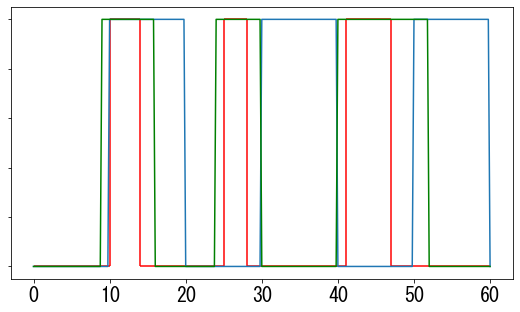

In [23]:
plt.rcParams["font.size"] = 20
autoex = pd.read_csv('../data/一定例.csv')
imfaex = pd.read_csv('../data/重要語顔例.csv')
fig = plt.figure(figsize=(9, 5))
plt.plot(autoex["seconds"], autoex["f_or_s"], label="(C3)")
plt.plot(imfaex["seconds"], imfaex["f_or_s"], label="(C4)", color="g")
# plt.xlabel("秒")
# plt.ylabel(" 正面を向く　　　　　　　スライドを向く")
# plt.title("C3とC4と重要語の対応")
plt.tick_params(labelleft=False)
# plt.legend()

# 重要語
plt.hlines(0, 0, 10, color="r")# y, x, x
plt.vlines(10, 0, 1, color="r")# x, y, y
plt.hlines(1, 10, 14, color="r")# y, x, x
plt.vlines(14, 0, 1, color="r")# x, y, y
plt.hlines(0, 14, 25, color="r")# y, x, x
plt.vlines(25, 0, 1, color="r")# x, y, y
plt.hlines(1, 25, 28, color="r")# y, x, x
plt.vlines(28, 0, 1, color="r")# x, y, y
plt.hlines(0, 28, 41, color="r")# y, x, x
plt.vlines(41, 0, 1, color="r")# x, y, y
plt.hlines(1, 41, 47, color="r")# y, x, x
plt.vlines(47, 0, 1, color="r")# x, y, y
plt.hlines(0, 47, 60, color="r")# y, x, x
plt.savefig("../data/グラフ類/vsc3c4.jpg")
plt.show()

## 説明用グラフの作成（ここまで）

In [ ]:
# 全体の箱ひげ図
# plt.boxplot([df["ty_poi"], df["au_poi"], df["ci_poi"]], labels=["ty", "au", "ci"])
# plt.show()

In [ ]:
df["test"] = df["ty_num"]
df

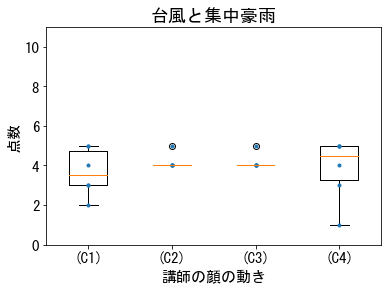

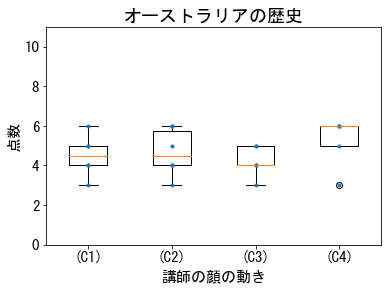

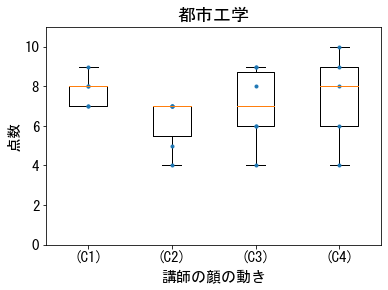

In [21]:
# 点数
# fig = plt.figure(figsize=(16, 9))
for i in range(3):
    if i == 0:
        plt.boxplot([df_1["ty_poi"], df_2["ty_poi"], df_3["ty_poi"], df_4["ty_poi"]], labels=["(C1)", "(C2)", "(C3)", "(C4)"])
        plt.plot(df["ty_num"], df["ty_poi"], ".")
        plt.title("台風と集中豪雨")
        plt.xlabel("講師の顔の動き")
        plt.ylabel("点数")
        plt.ylim(0, 11)
#         plt.savefig("../data/グラフ類/p_ty.pdf")
        plt.show()

# top right
    if i == 1:
        plt.boxplot([df_4["au_poi"], df_1["au_poi"], df_2["au_poi"], df_3["au_poi"]], labels=["(C1)", "(C2)", "(C3)", "(C4)"])
        plt.plot(df["au_num_ty"], df["au_poi"], ".")
        plt.title("オーストラリアの歴史")
        plt.xlabel("講師の顔の動き")
        plt.ylabel("点数")
        plt.ylim(0, 11)
#         plt.savefig("../data/グラフ類/p_au.pdf")
        plt.show()
        
# bottom left
    if i == 2:
#         ax3 = fig.add_subplot(2, 2, 3)
        plt.boxplot([df_3["ci_poi"], df_4["ci_poi"], df_1["ci_poi"], df_2["ci_poi"]], labels=["(C1)", "(C2)", "(C3)", "(C4)"])
        plt.plot(df["ci_num_ty"], df["ci_poi"], ".")
        plt.title("都市工学")
        plt.xlabel("講師の顔の動き")
        plt.ylabel("点数")
        plt.ylim(0, 11)
#         plt.savefig("../data/グラフ類/p_ci.pdf")
        plt.show()

# show plots
# plt.savefig('../data/グラフ類/scr_boxplot.jpg')
# fig.tight_layout()
# fig.show()

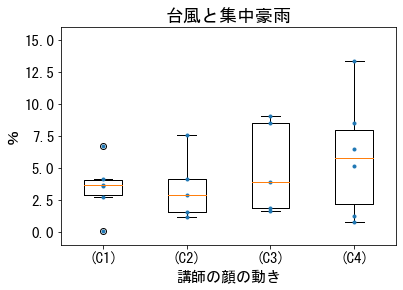

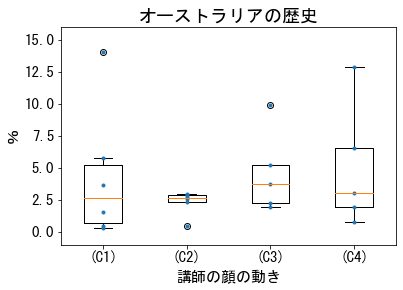

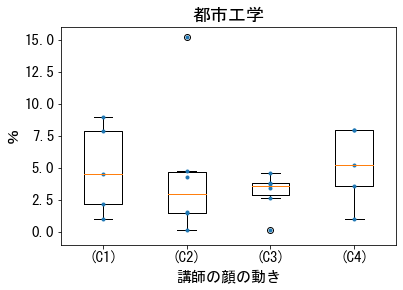

In [29]:
# 注視割合
# fig = plt.figure(figsize=(16, 9))
# top left
for i in range(3):
    if i == 0:
#         ax1 = fig.add_subplot(2, 2, 1)
        plt.boxplot([df_1["ty_look"], df_2["ty_look"], df_3["ty_look"], df_4["ty_look"]], labels=["(C1)", "(C2)", "(C3)", "(C4)"])
        plt.plot(df["ty_num"], df["ty_look"], ".")
        plt.title("台風と集中豪雨")
        plt.xlabel("講師の顔の動き")
        plt.ylabel("％")
        plt.ylim(-1, 16)
        plt.savefig("../data/グラフ類/l_ty.pdf")
        plt.show()

# top right
    if i == 1:
# ax2 = fig.add_subplot(2, 2, 2)
        plt.boxplot([df_4["au_look"], df_1["au_look"], df_2["au_look"], df_3["au_look"]], labels=["(C1)", "(C2)", "(C3)", "(C4)"])
        plt.plot(df["au_num_ty"], df["au_look"], ".")
        plt.title("オーストラリアの歴史")
        plt.xlabel("講師の顔の動き")
        plt.ylabel("％")
        plt.ylim(-1, 16)
        plt.savefig("../data/グラフ類/l_au.pdf")
        plt.show()
    
# bottom left
    if i == 2:
# ax3 = fig.add_subplot(2, 2, 3)
        plt.boxplot([df_3["ci_look"], df_4["ci_look"], df_1["ci_look"], df_2["ci_look"]], labels=["(C1)", "(C2)", "(C3)", "(C4)"])
        plt.plot(df["ci_num_ty"], df["ci_look"], ".")
        plt.title("都市工学")
        plt.xlabel("講師の顔の動き")
        plt.ylabel("％")
        plt.ylim(-1, 16)
        plt.savefig("../data/グラフ類/l_ci.pdf")
        plt.show()
    
# show plots
# plt.savefig('../data/グラフ類/look_boxplot.jpg')
# fig.tight_layout()
# fig.show()

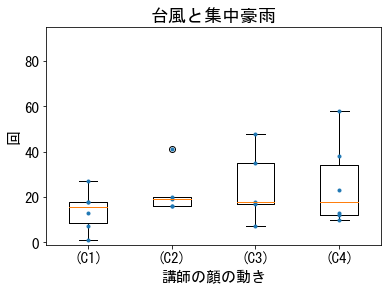

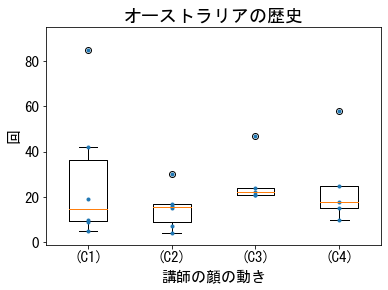

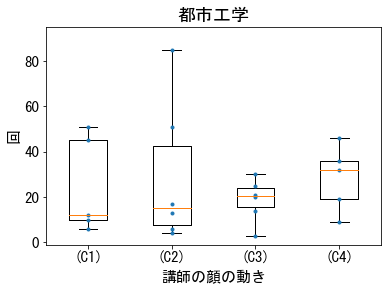

<ipython-input-115-63da91935781>:57: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


In [115]:
# 視線移動

df11m = df_m["ty_m"][df_m["num"]==1]
df22m = df_m["au_m"][df_m["num"]==1]
df33m = df_m["ci_m"][df_m["num"]==1]
df12m = df_m["ty_m"][df_m["num"]==2]
df23m = df_m["au_m"][df_m["num"]==2]
df34m = df_m["ci_m"][df_m["num"]==2]
df13m = df_m["ty_m"][df_m["num"]==3]
df24m = df_m["au_m"][df_m["num"]==3]
df31m = df_m["ci_m"][df_m["num"]==3]
df14m = df_m["ty_m"][df_m["num"]==4]
df21m = df_m["au_m"][df_m["num"]==4]
df32m = df_m["ci_m"][df_m["num"]==4]

# fig = plt.figure(figsize=(16, 9))
# top left
# ax1 = fig.add_subplot(2, 2, 1)
for i in range(3):
    if i == 0:
        plt.boxplot([df_m["ty_m"][df_m["num"]==1], df_m["ty_m"][df_m["num"]==2], df_m["ty_m"][df_m["num"]==3], df_m["ty_m"][df_m["num"]==4]], labels=["(C1)", "(C2)", "(C3)", "(C4)"])
        plt.plot(df["ty_num"], df_m["ty_m"], ".")
        plt.title("台風と集中豪雨")
        plt.xlabel("講師の顔の動き")
        plt.ylabel("回")
        plt.ylim(-1, 95)
#         plt.savefig("../data/グラフ類/m_ty.pdf")
        plt.show()
        
# top right
# ax2 = fig.add_subplot(2, 2, 2)
    if i == 1:
        plt.boxplot([df_m["au_m"][df_m["num"]==4], df_m["au_m"][df_m["num"]==1], df_m["au_m"][df_m["num"]==2], df_m["au_m"][df_m["num"]==3]], labels=["(C1)", "(C2)", "(C3)", "(C4)"])
        plt.plot(df["au_num_ty"], df_m["au_m"], ".")
        plt.title("オーストラリアの歴史")
        plt.xlabel("講師の顔の動き")
        plt.ylabel("回")
        plt.ylim(-1, 95)
#         plt.savefig("../data/グラフ類/m_au.pdf")
        plt.show()

# bottom left
# ax3 = fig.add_subplot(2, 2, 3)
    if i == 2:
        plt.boxplot([df_m["ci_m"][df_m["num"]==3], df_m["ci_m"][df_m["num"]==4], df_m["ci_m"][df_m["num"]==1], df_m["ci_m"][df_m["num"]==2]], labels=["(C1)", "(C2)", "(C3)", "(C4)"])
        plt.plot(df["ci_num_ty"], df_m["ci_m"], ".")
        plt.title("都市工学")
        plt.xlabel("講師の顔の動き")
        plt.ylabel("回")
        plt.ylim(-1, 95)
        plt.savefig("../data/グラフ類/m_ci.pdf")
        plt.show()
        
# show plots
# plt.savefig('../data/グラフ類/move_boxplot.jpg')
fig.tight_layout()
fig.show()

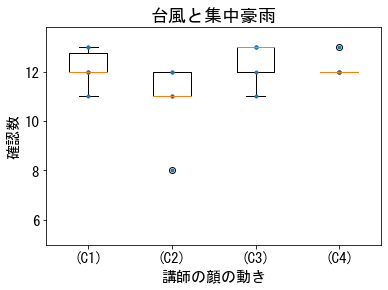

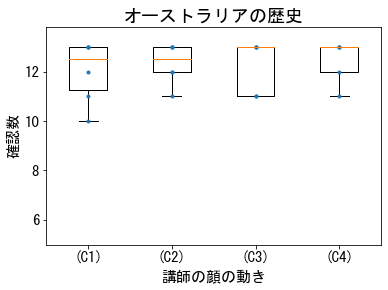

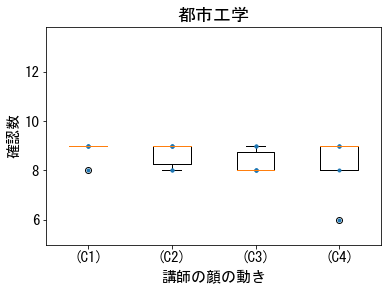

In [117]:
# 重要語
# fig = plt.figure(figsize=(16, 9))
# top left
# ax1 = fig.add_subplot(2, 2, 1)
for i in range(3):
    if i == 0:
        plt.boxplot([df_im["ty_ch"][df_im["num"]==1], df_im["ty_ch"][df_im["num"]==2], df_im["ty_ch"][df_im["num"]==3], df_im["ty_ch"][df_im["num"]==4]], labels=["(C1)", "(C2)", "(C3)", "(C4)"])
        plt.plot(df["ty_num"], df_im["ty_ch"], ".")
        plt.title("台風と集中豪雨")
        plt.xlabel("講師の顔の動き")
        plt.ylabel("確認数")
        plt.ylim(5, 13.8)
#         plt.savefig("../data/グラフ類/im_ty.pdf")
        plt.show()

# top right
# ax2 = fig.add_subplot(2, 2, 2)
    if i == 1:
        plt.boxplot([df_im["au_ch"][df_im["num"]==4], df_im["au_ch"][df_im["num"]==1], df_im["au_ch"][df_im["num"]==2], df_im["au_ch"][df_im["num"]==3]], labels=["(C1)", "(C2)", "(C3)", "(C4)"])
        plt.plot(df["au_num_ty"], df_im["au_ch"], ".")
        plt.title("オーストラリアの歴史")
        plt.xlabel("講師の顔の動き")
        plt.ylabel("確認数")
        plt.ylim(5, 13.8)
        plt.savefig("../data/グラフ類/im_au.pdf")
        plt.show()

# bottom left
# ax3 = fig.add_subplot(2, 2, 3)
    if i == 2:
        plt.boxplot([df_im["ci_ch"][df_im["num"]==3], df_im["ci_ch"][df_im["num"]==4], df_im["ci_ch"][df_im["num"]==1], df_im["ci_ch"][df_im["num"]==2]], labels=["(C1)", "(C2)", "(C3)", "(C4)"])
        plt.plot(df["ci_num_ty"], df_im["ci_ch"], ".")
        plt.title("都市工学")
        plt.xlabel("講師の顔の動き")
        plt.ylabel("確認数")
        plt.ylim(5, 13.8)
#         plt.savefig("../data/グラフ類/im_ci.pdf")
        plt.show()

# show plots
# plt.savefig('../data/グラフ類/im_boxplot.jpg')
# fig.tight_layout()
# fig.show()

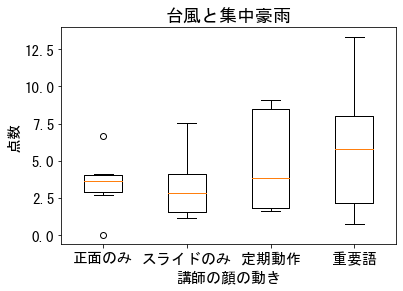

In [23]:
# 台風の箱ひげ図
# plt.boxplot([df_1["ty_poi"], df_2["ty_poi"], df_3["ty_poi"], df_4["ty_poi"]], labels=["正面のみ", "スライドのみ", "定期動作", "重要語"])
plt.boxplot([df_1["ty_look"], df_2["ty_look"], df_3["ty_look"], df_4["ty_look"]], labels=["正面のみ", "スライドのみ", "定期動作", "重要語"])
# plt.boxplot([df_m["ty_m"][df_m["num"]==1], df_m["ty_m"][df_m["num"]==2], df_m["ty_m"][df_m["num"]==3], df_m["ty_m"][df_m["num"]==4]], labels=["正面のみ", "スライドのみ", "定期動作", "重要語"])
# for i in range(4):
# plt.plot(df_m["num"], df_m["ty_m"], ".")
#     plt.plot([df_m["ty_m"][df_m["num"]==1], df_m["ty_m"][df_m["num"]==2], df_m["ty_m"][df_m["num"]==3], df_m["ty_m"][df_m["num"]==4]], ".")

plt.xlabel("講師の顔の動き")
plt.ylabel("点数")
plt.title("台風と集中豪雨")
plt.show()

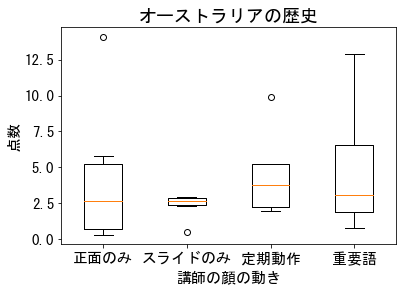

In [24]:
# オーストラリアの箱ひげ図
# plt.boxplot([df_4["au_poi"], df_1["au_poi"], df_2["au_poi"], df_3["au_poi"]], labels=["正面のみ", "スライドのみ", "定期動作", "重要語"])
plt.boxplot([df_4["au_look"], df_1["au_look"], df_2["au_look"], df_3["au_look"]], labels=["正面のみ", "スライドのみ", "定期動作", "重要語"])
# plt.boxplot([df_m["au_m"][df_m["num"]==4], df_m["au_m"][df_m["num"]==1], df_m["au_m"][df_m["num"]==2], df_m["au_m"][df_m["num"]==3]], labels=["正面のみ", "スライドのみ", "定期動作", "重要語"])
plt.title("オーストラリアの歴史")
plt.xlabel("講師の顔の動き")
plt.ylabel("点数")
plt.show()

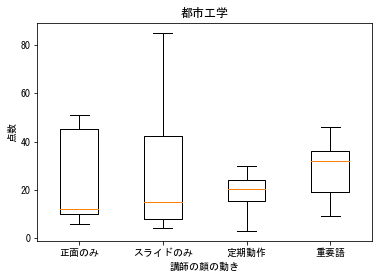

In [72]:
# 都市工学の箱ひげ図
plt.boxplot([df_1["ci_poi"], df_2["ci_poi"], df_3["ci_poi"], df_4["ci_poi"]], labels=["正面のみ", "スライドのみ", "定期動作", "重要語"])
plt.boxplot([df_3["ci_look"], df_4["ci_look"], df_1["ci_look"], df_2["ci_look"]], labels=["正面のみ", "スライドのみ", "定期動作", "重要語"])
plt.boxplot([df_m["ci_m"][df_m["num"]==3], df_m["ci_m"][df_m["num"]==4], df_m["ci_m"][df_m["num"]==1], df_m["ci_m"][df_m["num"]==2]], labels=["正面のみ", "スライドのみ", "定期動作", "重要語"])
plt.title("都市工学")
plt.xlabel("講師の顔の動き")
plt.ylabel("点数")
plt.show()

## 科目混ぜ条件別（不使用）

In [5]:
df1 = pd.concat([df_1_1, df_4_1, df_3_1]).reset_index(drop=True)
df2 = pd.concat([df_2_2, df_1_2, df_4_2]).reset_index(drop=True)
df3 = pd.concat([df_3_3, df_2_3, df_1_3]).reset_index(drop=True)
df4 = pd.concat([df_4_4, df_3_4, df_2_4]).reset_index(drop=True)
df4

,4poi,4look,4move
0,4.0,6.47,36.0
1,1.0,13.33,48.0
2,5.0,1.22,10.0
3,5.0,5.11,22.0
4,5.0,0.73,10.0
5,3.0,8.49,13.0
6,6.0,0.76,11.0
7,3.0,6.55,18.0
8,6.0,3.07,25.0
9,6.0,12.88,57.0


### 点数

In [6]:
# dfpa = pd.concat([df1["1poi"], df2["2poi"], df3["3poi"], df4["4poi"]], axis=1)
# dfpa = dfpa.fillna(dfpa.median(numeric_only=True))
# dfpa = (dfpa - dfpa.values.min()) / (dfpa.values.max() - dfpa.values.min())

df1p = df1["1poi"]
df1p.loc["17"] = 10
df1p.loc["18"] = 0
# print(df1p)
df1p = (df1p - df1p.values.min()) / (df1p.values.max() - df1p.values.min())
df1p = df1p.drop(["17", "18"])

df2p = df2["2poi"]
df2p.loc["17"] = 10
df2p.loc["18"] = 0
df2p = (df2p - df2p.values.min()) / (df2p.values.max() - df2p.values.min())
df2p = df2p.drop(["17", "18"])

df3p = df3["3poi"]
# df1p.loc["16"] = df3p.median()
df3p.loc["17"] = 10
df3p.loc["18"] = 0
df3p = (df3p - df3p.values.min()) / (df3p.values.max() - df3p.values.min())
df3p = df3p.drop(["17", "18"])

df4p = df4["4poi"]
# df1p.loc["16"] = df4p.median()
df4p.loc["17"] = 10
df4p.loc["18"] = 0
df4p = (df4p - df4p.values.min()) / (df4p.values.max() - df4p.values.min())
df4p = df4p.drop(["17", "18"])

# print(type(df3p))
# dfpp = pd.concat(["df1p", "df2p", "df3p", "df4p"], axis=1)
# dfpa
# dfpa.to_csv("point_all_all.csv")
# dfpp.to_csv("point_all_each.csv")

In [7]:
df1p

0     2.0
1     3.0
2     5.0
3     5.0
4     4.0
5     3.0
6     5.0
7     3.0
8     5.0
9     4.0
10    6.0
11    4.0
12    9.0
13    7.0
14    8.0
15    8.0
16    7.0
Name: 1poi, dtype: float64

In [7]:
# 正規性（p>0.05）
_, pa = stats.shapiro(df1p)
_, pb = stats.shapiro(df2p)
_, pc = stats.shapiro(df3p)
_, pd = stats.shapiro(df4p)

# _, pa = stats.shapiro(dfpa["1poi"])
# _, pb = stats.shapiro(dfpa["2poi"])
# _, pc = stats.shapiro(dfpa["3poi"])
# _, pd = stats.shapiro(dfpa["4poi"])

print('シャピロ・ウィルク検定')
print(f'標本A p値 = {pa:.3f}')
print(f'標本B p値 = {pb:.3f}')
print(f'標本C p値 = {pc:.3f}')
print(f'標本D p値 = {pd:.3f}')

シャピロ・ウィルク検定
標本A p値 = 0.396
標本B p値 = 0.011
標本C p値 = 0.003
標本D p値 = 0.591


In [8]:
# 等分散性（p>0.05）
_, p1 = stats.levene(df1p,df2p,center='mean')
_, p2 = stats.levene(df1p,df3p,center='mean')
_, p3 = stats.levene(df1p,df4p,center='mean')
_, p4 = stats.levene(df2p,df3p,center='mean')
_, p5 = stats.levene(df2p,df4p,center='mean')
_, p6 = stats.levene(df3p,df4p,center='mean')

# _, p1 = stats.levene(dfpa["1poi"],dfpa["2poi"],center='mean')
# _, p2 = stats.levene(dfpa["1poi"],dfpa["3poi"],center='mean')
# _, p3 = stats.levene(dfpa["1poi"],dfpa["4poi"],center='mean')
# _, p4 = stats.levene(dfpa["2poi"],dfpa["3poi"],center='mean')
# _, p5 = stats.levene(dfpa["2poi"],dfpa["4poi"],center='mean')
# _, p6 = stats.levene(dfpa["3poi"],dfpa["4poi"],center='mean')

print('ルビーン検定')
print(f'p値 = {p1:.3f}')
print(f'p値 = {p2:.3f}')
print(f'p値 = {p3:.3f}')
print(f'p値 = {p4:.3f}')
print(f'p値 = {p5:.3f}')
print(f'p値 = {p6:.3f}')

ルビーン検定
p値 = 0.124
p値 = 0.665
p値 = 0.945
p値 = 0.299
p値 = 0.185
p値 = 0.664


In [9]:
t, p = stats.ttest_ind(df3p, df4p, equal_var=False)
# t, p = stats.ttest_ind(dfpa["2poi"], dfpa["3poi"], equal_var=False)
print(f"{t:.3f}, {p:.3f}")

-0.169, 0.867


### 注視

In [14]:
# df1l = pd.concat([df1["1look"], df2["2look"], df3["3look"], df4["4look"]], axis=1)
# df1l = df1l.fillna(df1l.median(numeric_only=True))
df1l = df1["1look"]
# df1l = (df1l - df1l.values.min()) / (df1l.values.max() - df1l.values.min())
df2l = df2["2look"]
# df2l = (df2l - df2l.values.min()) / (df2l.values.max() - df2l.values.min())
df3l = df3["3look"]
# df3l = (df3l - df3l.values.min()) / (df3l.values.max() - df3l.values.min())
df4l = df4["4look"]
# df4l = (df4l - df4l.values.min()) / (df4l.values.max() - df4l.values.min())
# df1l

In [24]:
# _, pa = stats.shapiro(df1l)
# _, pb = stats.shapiro(df2l)
# _, pc = stats.shapiro(df3l)
# _, pd = stats.shapiro(df4l)

_, pa = stats.shapiro(df1l["1look"])
_, pb = stats.shapiro(df1l["2look"])
_, pc = stats.shapiro(df1l["3look"])
_, pd = stats.shapiro(df1l["4look"])

print('シャピロ・ウィルク検定')
print(f'標本A p値 = {pa:.3f}')
print(f'標本B p値 = {pb:.3f}')
print(f'標本C p値 = {pc:.3f}')
print(f'標本D p値 = {pd:.3f}')

シャピロ・ウィルク検定
標本A p値 = 0.056
標本B p値 = 0.000
標本C p値 = 0.029
標本D p値 = 0.128


In [25]:
# _, p1 = stats.levene(df1l,df2l,center='mean')
# _, p2 = stats.levene(df1l,df3l,center='mean')
# _, p3 = stats.levene(df1l,df4l,center='mean')
# _, p4 = stats.levene(df2l,df3l,center='mean')
# _, p5 = stats.levene(df2l,df4l,center='mean')
# _, p6 = stats.levene(df3l,df4l,center='mean')

_, p1 = stats.levene(df1l["1look"],df1l["2look"],center='mean')
_, p2 = stats.levene(df1l["1look"],df1l["3look"],center='mean')
_, p3 = stats.levene(df1l["1look"],df1l["4look"],center='mean')
_, p4 = stats.levene(df1l["2look"],df1l["3look"],center='mean')
_, p5 = stats.levene(df1l["2look"],df1l["4look"],center='mean')
_, p6 = stats.levene(df1l["3look"],df1l["4look"],center='mean')

print('ルビーン検定')
print(f'p値 = {p1:.3f}')
print(f'p値 = {p2:.3f}')
print(f'p値 = {p3:.3f}')
print(f'p値 = {p4:.3f}')
print(f'p値 = {p5:.3f}')
print(f'p値 = {p6:.3f}')

ルビーン検定
p値 = 0.595
p値 = 0.330
p値 = 0.639
p値 = 0.751
p値 = 0.330
p値 = 0.132


In [77]:
t, p = stats.ttest_ind(df3l, df4l, equal_var=False)
# t, p = stats.ttest_ind(df1l["2look"], df1l["3look"])
print(f"{t:.3f}, {p:.3f}")
# stats.mannwhitneyu(df2l, df3l, alternative='two-sided')

-1.014, 0.320


### 視線移動回数

In [21]:
# df1m = pd.concat([df1["1move"], df2["2move"], df3["3move"], df4["4move"]], axis=1)
# df1m = df1m.fillna(df1m.median(numeric_only=True))
df1m = df1["1move"]
# df1m = (df1m - df1m.values.min()) / (df1m.values.max() - df1m.values.min())
df2m = df2["2move"]
# df2m = (df2m - df2m.values.min()) / (df2m.values.max() - df2m.values.min())
df3m = df3["3move"]
# df3m = (df3m - df3m.values.min()) / (df3m.values.max() - df3m.values.min())
df4m = df4["4move"]
# df4m = (df4m - df4m.values.min()) / (df4m.values.max() - df4m.values.min())
# df1m

In [38]:
print(f'標本Aの母集団の平均の推定値 = {df3m.mean():.2f}')
print(f'標本Bの母集団の平均の推定値 = {df4m.mean():.2f}')
print(f'標本Aの母集団の標準偏差の推定値（不偏標準偏差）= {df3m.std(ddof=1):.2f}')
print(f'標本Bの母集団の標準偏差の推定値（不偏標準偏差）= {df4m.std(ddof=1):.2f}')

NameError: name 'df3m' is not defined

In [37]:
# print(f'標本Aの母集団の平均の推定値 = {df1m["1move"].mean():.2f}')
# print(f'標本Bの母集団の平均の推定値 = {df1m["2move"].mean():.2f}')
# print(f'標本Aの母集団の標準偏差の推定値（不偏標準偏差）= {df1m["1move"].std(ddof=1):.2f}')
# print(f'標本Bの母集団の標準偏差の推定値（不偏標準偏差）= {df1m["2move"].std(ddof=1):.2f}')

In [39]:
# _, pa = stats.shapiro(df1m)
# _, pb = stats.shapiro(df2m)
# _, pc = stats.shapiro(df3m)
# _, pd = stats.shapiro(df4m)

_, pa = stats.shapiro(df1m["1move"])
_, pb = stats.shapiro(df1m["2move"])
_, pc = stats.shapiro(df1m["3move"])
_, pd = stats.shapiro(df1m["4move"])

print('シャピロ・ウィルク検定')
print(f'標本A p値 = {pa:.3f}')
print(f'標本B p値 = {pb:.3f}')
print(f'標本C p値 = {pc:.3f}')
print(f'標本D p値 = {pd:.3f}')

シャピロ・ウィルク検定
標本A p値 = 0.020
標本B p値 = 0.000
標本C p値 = 0.065
標本D p値 = 0.082


In [40]:
# _, p1 = stats.levene(df1m,df2m,center='mean')
# _, p2 = stats.levene(df1m,df3m,center='mean')
# _, p3 = stats.levene(df1m,df4m,center='mean')
# _, p4 = stats.levene(df2m,df3m,center='mean')
# _, p5 = stats.levene(df2m,df4m,center='mean')
# _, p6 = stats.levene(df3m,df4m,center='mean')

_, p1 = stats.levene(df1m["1move"],df1m["2move"],center='mean')
_, p2 = stats.levene(df1m["1move"],df1m["3move"],center='mean')
_, p3 = stats.levene(df1m["1move"],df1m["4move"],center='mean')
_, p4 = stats.levene(df1m["2move"],df1m["3move"],center='mean')
_, p5 = stats.levene(df1m["2move"],df1m["4move"],center='mean')
_, p6 = stats.levene(df1m["3move"],df1m["4move"],center='mean')

print('ルビーン検定')
print(f'p値 = {p1:.3f}')
print(f'p値 = {p2:.3f}')
print(f'p値 = {p3:.3f}')
print(f'p値 = {p4:.3f}')
print(f'p値 = {p5:.3f}')
print(f'p値 = {p6:.3f}')

ルビーン検定
p値 = 0.703
p値 = 0.072
p値 = 0.537
p値 = 0.239
p値 = 0.906
p値 = 0.154


In [88]:
# t, p = stats.ttest_ind(df1m["2move"], df1m["3move"])
t, p = stats.ttest_ind(df2m, df3m, equal_var=False)
# MU = abs(df3m.mean()-df4m.mean())
# SE =  MU/t
# DF = len(df3m)+len(df4m)-2
# CI = stats.t.interval( alpha=0.95, loc=MU, scale=SE, df=DF )

# print('t検定')
print(f"{t:.3f}, {p:.3f}")
# print(f'p値 = {p:.3f}')
# print(f't値 = {t:.2f}')
# print(f'平均値の差   = {MU:.2f}')
# print(f'差の標準誤差 = {SE:.2f}')
# print(f'平均値の差の95%信頼区間CI = [{CI[0]:.2f} , {CI[1]:.2f}]')

-0.305, 0.763


In [142]:
t, p = stats.ttest_ind(df1m, df2m, equal_var=False)
# t, p = stats.ttest_ind(df1m["2move"], df1m["4move"])
print(f"{t:.3f}, {p:.3f}")

# マンホイットニーのU検定
# stats.mannwhitneyu(df1m, df2m, alternative='greater')

-0.055, 0.957


In [203]:
stats.ttest_ind(df3m, df4m)

Ttest_indResult(statistic=0.783238395250246, pvalue=0.43962695367100546)

## 科目・条件別t検定・U検定

In [6]:
# 前：科目、後：講義の種類
# 点数
df11p = df_1_1["1poi"]
df22p = df_1_2["2poi"]
df33p = df_1_3["3poi"]
df12p = df_2_2["2poi"]
df23p = df_2_3["3poi"]
df34p = df_2_4["4poi"]
df13p = df_3_3["3poi"]
df24p = df_3_4["4poi"]
df31p = df_3_1["1poi"]
df14p = df_4_4["4poi"]
df21p = df_4_1["1poi"]
df32p = df_4_2["2poi"]

# 注視
df11l = df_1_1["1look"]
df22l = df_1_2["2look"]
df33l = df_1_3["3look"]
df12l = df_2_2["2look"]
df23l = df_2_3["3look"]
df34l = df_2_4["4look"]
df13l = df_3_3["3look"]
df24l = df_3_4["4look"]
df31l = df_3_1["1look"]
df14l = df_4_4["4look"]
df21l = df_4_1["1look"]
df32l = df_4_2["2look"]

# 移動
# df11m = df_1_1["1move"]
# df22m = df_1_2["2move"]
# df33m = df_1_3["3move"]
# df12m = df_2_2["2move"]
# df23m = df_2_3["3move"]
# df34m = df_2_4["4move"]
# df13m = df_3_3["3move"]
# df24m = df_3_4["4move"]
# df31m = df_3_1["1move"]
# df14m = df_4_4["4move"]
# df21m = df_4_1["1move"]
# df32m = df_4_2["2move"]
df11m = df_m["ty_m"][df_m["num"]==1]
df22m = df_m["au_m"][df_m["num"]==1]
df33m = df_m["ci_m"][df_m["num"]==1]
df12m = df_m["ty_m"][df_m["num"]==2]
df23m = df_m["au_m"][df_m["num"]==2]
df34m = df_m["ci_m"][df_m["num"]==2]
df13m = df_m["ty_m"][df_m["num"]==3]
df24m = df_m["au_m"][df_m["num"]==3]
df31m = df_m["ci_m"][df_m["num"]==3]
df14m = df_m["ty_m"][df_m["num"]==4]
df21m = df_m["au_m"][df_m["num"]==4]
df32m = df_m["ci_m"][df_m["num"]==4]

df11im = df_im["ty_ch"][df_im["num"]==1]
df12im = df_im["ty_ch"][df_im["num"]==2]
df13im = df_im["ty_ch"][df_im["num"]==3]
df14im = df_im["ty_ch"][df_im["num"]==4]

df22im = df_im["au_ch"][df_im["num"]==1]
df23im = df_im["au_ch"][df_im["num"]==2]
df24im = df_im["au_ch"][df_im["num"]==3]
df21im = df_im["au_ch"][df_im["num"]==4]

df33im = df_im["ci_ch"][df_im["num"]==1]
df34im = df_im["ci_ch"][df_im["num"]==2]
df31im = df_im["ci_ch"][df_im["num"]==3]
df32im = df_im["ci_ch"][df_im["num"]==4]

# print(df12l.mean())
# print(df21l.mean())
# print("-----")
# print(df22l.mean())
# print(df32m.mean())
# print("-----")
# print(df23l.mean())
# print(df34l.mean())
# df31m
# df31m.mean()

In [7]:
df31m

2     10.0
6     12.0
10    51.0
14    45.0
18     6.0
Name: ci_m, dtype: float64

In [8]:
# df32m.mean()
# df32m
# print(df11l.mean())
# print(df21l.mean())
# print("-----")
# print(df22l.mean())
# print(df32l.mean())
# print("-----")
# print(df23l.mean())
# print(df33l.mean())

# print(df12p.mean())
# print(df13p.mean())
# print(df23p.mean())
# df11l.

In [20]:
# 外れ値の処理
df12p = df12p[df12p<5]
df13p = df13p[df13p<5]
df24p = df24p[df24p!=3]

df11l = df11l[(df11l<5) & (df11l>2)]
df21l = df21l[df21l<12.5]
df22l = df22l[df22l>1]
df23l = df23l[df23l<9]
df32l = df32l[df32l<14]
df33l = df33l[df33l>1]

df12m = df12m[df12m<40]
df21m = df21m[df21m<60]
df22m = df22m[df22m<25]
df23m = df23m[df23m<40]
df24m = df24m[df24m<50]
# df32m = df32m[df32m<45]
# df33m = df33m[df33m>15]

df12im = df12im[df12im!=8]
df14im = df14im[df14im!=13]
df31im = df31im[df31im!=8]
df34im = df34im[df34im!=6]

print(df12m.mean())
print(df21m.mean())
print("-----")
print(df22m.mean())
# print(df32m.mean())
print("-----")
print(df23m.mean())
print(df24m.mean())

17.75
17.0
-----
11.8
-----
22.0
17.0


In [70]:
# 上限下限を揃えたt検定の正規化用

# df111p = pd.concat([df11p, df21p, df31p]).reset_index(drop=True)
df11p["17"] = 6
df11p["18"] = 0
# df111p = (df111p - df111p.values.min()) / (df111p.values.max() - df111p.values.min())
df11p = df11p.drop(["17", "18"])
df11p

0    2.0
1    3.0
2    5.0
3    5.0
4    4.0
5    3.0
Name: 1poi, dtype: float64

In [8]:
# まとめて正規化
dfty = pd.concat([df_1_1, df_2_2, df_3_3, df_4_4], axis=1)
dfty = dfty.fillna(dfty.median(numeric_only=True))
dftyp = dfty[["1poi", "2poi", "3poi", "4poi"]]
dftyl = dfty[["1look", "2look", "3look", "4look"]]
dftym = dfty[["1move", "2move", "3move", "4move"]]

dfau = pd.concat([df_1_2, df_2_3, df_3_4, df_4_1], axis=1)
dfau = dfau.fillna(dfau.median(numeric_only=True))
dfaup = dfau[["1poi", "2poi", "3poi", "4poi"]]
dfaul = dfau[["1look", "2look", "3look", "4look"]]
dfaum = dfau[["1move", "2move", "3move", "4move"]]

dfci = pd.concat([df_1_3, df_2_4, df_3_1, df_4_2], axis=1)
dfci = dfci.fillna(dfci.median(numeric_only=True))
dfcip = dfci[["1poi", "2poi", "3poi", "4poi"]]
dfcil = dfci[["1look", "2look", "3look", "4look"]]
dfcim = dfci[["1move", "2move", "3move", "4move"]]

# dftyp = (dftyp - dftyp.values.min()) / (dftyp.values.max() - dftyp.values.min())
# dftyl = (dftyl - dftyl.values.min()) / (dftyl.values.max() - dftyl.values.min())
# dftym = (dftym - dftym.values.min()) / (dftym.values.max() - dftym.values.min())

# dfaup = (dfaup - dfaup.values.min()) / (dfaup.values.max() - dfaup.values.min())
# dfaul = (dfaul - dfaul.values.min()) / (dfaul.values.max() - dfaul.values.min())
# dfaum = (dfaum - dfaum.values.min()) / (dfaum.values.max() - dfaum.values.min())

# dfcip = (dfcip - dfcip.values.min()) / (dfcip.values.max() - dfcip.values.min())
# dfcil = (dfcil - dfcil.values.min()) / (dfcil.values.max() - dfcil.values.min())
# dfcim = (dfcim - dfcim.values.min()) / (dfcim.values.max() - dfcim.values.min())

dftyp

,1poi,2poi,3poi,4poi
0,2.0,4.0,4.0,4.0
1,3.0,4.0,4.0,1.0
2,5.0,5.0,4.0,5.0
3,5.0,4.0,5.0,5.0
4,4.0,4.0,4.0,5.0
5,3.0,4.0,4.0,3.0


## 点数

In [12]:
# 正規性
_, p1 = stats.shapiro(df11p)
_, p2 = stats.shapiro(df12p)
_, p3 = stats.shapiro(df13p)
_, p4 = stats.shapiro(df14p)
_, p5 = stats.shapiro(df21p)
_, p6 = stats.shapiro(df22p)
_, p7 = stats.shapiro(df23p)
_, p8 = stats.shapiro(df24p)
_, p9 = stats.shapiro(df31p)
_, p10 = stats.shapiro(df32p)
_, p11 = stats.shapiro(df33p)
_, p12 = stats.shapiro(df34p)

# _, p1 = stats.shapiro(dftyp["1poi"])
# _, p2 = stats.shapiro(dftyp["2poi"])
# _, p3 = stats.shapiro(dftyp["3poi"])
# _, p4 = stats.shapiro(dftyp["4poi"])
# _, p5 = stats.shapiro(dfaup["1poi"])
# _, p6 = stats.shapiro(dfaup["2poi"])
# _, p7 = stats.shapiro(dfaup["3poi"])
# _, p8 = stats.shapiro(dfaup["4poi"])
# _, p9 = stats.shapiro(dfcip["1poi"])
# _, p10 = stats.shapiro(dfcip["2poi"])
# _, p11 = stats.shapiro(dfcip["3poi"])
# _, p12 = stats.shapiro(dfcip["4poi"])

print('シャピロ・ウィルク検定')
print(f'標本11 p値 = {p1:.3f}')
print(f'標本12 p値 = {p2:.3f}')
print(f'標本13 p値 = {p3:.3f}')
print(f'標本14 p値 = {p4:.3f}')
print("------")
print(f'標本21 p値 = {p5:.3f}')
print(f'標本22 p値 = {p6:.3f}')
print(f'標本23 p値 = {p7:.3f}')
print(f'標本24 p値 = {p8:.3f}')
print("------")
print(f'標本31 p値 = {p9:.3f}')
print(f'標本32 p値 = {p10:.3f}')
print(f'標本33 p値 = {p11:.3f}')
print(f'標本34 p値 = {p12:.3f}')

シャピロ・ウィルク検定
標本11 p値 = 0.415
標本12 p値 = 0.000
標本13 p値 = 0.000
標本14 p値 = 0.070
------
標本21 p値 = 0.820
標本22 p値 = 0.415
標本23 p値 = 0.314
標本24 p値 = 0.021
------
標本31 p値 = 0.314
標本32 p値 = 0.007
標本33 p値 = 0.352
標本34 p値 = 0.787


In [10]:
_, p1 = stats.levene(df11p,df12p,center='mean')
_, p2 = stats.levene(df11p,df13p,center='mean')
_, p3 = stats.levene(df11p,df14p,center='mean')
_, p4 = stats.levene(df12p,df13p,center='mean')
_, p5 = stats.levene(df12p,df14p,center='mean')
_, p6 = stats.levene(df13p,df14p,center='mean')
_, pa = stats.levene(df21p,df22p,center='mean')
_, pb = stats.levene(df21p,df23p,center='mean')
_, pc = stats.levene(df21p,df24p,center='mean')
_, pd = stats.levene(df22p,df23p,center='mean')
_, pe = stats.levene(df22p,df24p,center='mean')
_, pf = stats.levene(df23p,df24p,center='mean')
_, pu = stats.levene(df31p,df32p,center='mean')
_, pv = stats.levene(df31p,df33p,center='mean')
_, pw = stats.levene(df31p,df34p,center='mean')
_, px = stats.levene(df32p,df33p,center='mean')
_, py = stats.levene(df32p,df34p,center='mean')
_, pz = stats.levene(df33p,df34p,center='mean')

# _, p1 = stats.levene(dftyp["1poi"],dftyp["2poi"],center='mean')
# _, p2 = stats.levene(dftyp["1poi"],dftyp["3poi"],center='mean')
# _, p3 = stats.levene(dftyp["1poi"],dftyp["4poi"],center='mean')
# _, p4 = stats.levene(dftyp["2poi"],dftyp["3poi"],center='mean')
# _, p5 = stats.levene(dftyp["2poi"],dftyp["4poi"],center='mean')
# _, p6 = stats.levene(dftyp["3poi"],dftyp["4poi"],center='mean')
# _, pa = stats.levene(dfaup["1poi"],dfaup["2poi"],center='mean')
# _, pb = stats.levene(dfaup["1poi"],dfaup["3poi"],center='mean')
# _, pc = stats.levene(dfaup["1poi"],dfaup["4poi"],center='mean')
# _, pd = stats.levene(dfaup["2poi"],dfaup["3poi"],center='mean')
# _, pe = stats.levene(dfaup["2poi"],dfaup["4poi"],center='mean')
# _, pf = stats.levene(dfaup["3poi"],dfaup["4poi"],center='mean')
# _, pu = stats.levene(dfcip["1poi"],dfcip["2poi"],center='mean')
# _, pv = stats.levene(dfcip["1poi"],dfcip["3poi"],center='mean')
# _, pw = stats.levene(dfcip["1poi"],dfcip["4poi"],center='mean')
# _, px = stats.levene(dfcip["2poi"],dfcip["3poi"],center='mean')
# _, py = stats.levene(dfcip["2poi"],dfcip["4poi"],center='mean')
# _, pz = stats.levene(dfcip["3poi"],dfcip["4poi"],center='mean')

print('ルビーン検定')
print(f'p値 = {p1:.3f}')
print(f'p値 = {p2:.3f}')
print(f'p値 = {p3:.3f}')
print(f'p値 = {p4:.3f}')
print(f'p値 = {p5:.3f}')
print(f'p値 = {p6:.3f}')
print("------")
print(f'p値 = {pa:.3f}')
print(f'p値 = {pb:.3f}')
print(f'p値 = {pc:.3f}')
print(f'p値 = {pd:.3f}')
print(f'p値 = {pe:.3f}')
print(f'p値 = {pf:.3f}')
print("------")
print(f'p値 = {pu:.3f}')
print(f'p値 = {pv:.3f}')
print(f'p値 = {pw:.3f}')
print(f'p値 = {px:.3f}')
print(f'p値 = {py:.3f}')
print(f'p値 = {pz:.3f}')

ルビーン検定
p値 = 0.027
p値 = 0.027
p値 = 0.605
p値 = 1.000
p値 = 0.056
p値 = 0.056
------
p値 = 0.588
p値 = 0.524
p値 = 0.746
p値 = 0.248
p値 = 0.918
p値 = 0.428
------
p値 = 0.148
p値 = 0.033
p値 = 0.041
p値 = 0.193
p値 = 0.142
p値 = 0.670


In [10]:
# dfp1 = dfcip["3poi"]
# dfp2 = dfcip["4poi"]

# 1x=6, 2x=8, 3x=10
dfp1 = df31p
# dfp1["17"] = 10
# dfp1["18"] = 0

dfp2 = df32p
# dfp2["17"] = 10
# dfp2["18"] = 0

# dfp1 = (dfp1 - dfp1.values.min()) / (dfp1.values.max() - dfp1.values.min())
# dfp2 = (dfp2 - dfp2.values.min()) / (dfp2.values.max() - dfp2.values.min())
# dfp1 = dfp1.drop(["17", "18"])
# dfp2 = dfp2.drop(["17", "18"])
# print(dfp2)

# t, p = stats.ttest_ind(dfp1, dfp2, equal_var=False)
t, p = stats.mannwhitneyu(dfp1, dfp2, alternative='two-sided')
print(f"{t:.3f}, {p:.3f}")

2.478, 0.037


In [8]:
print(df11p.mean())
print(df12p.mean())
print(df13p.mean())
print(df14p.mean())
print("-------------")
print(df21p.mean())
print(df22p.mean())
print(df23p.mean())
print(df24p.mean())
print("-----------------")
print(df31p.mean())
print(df32p.mean())
print(df33p.mean())
print(df34p.mean())

3.6666666666666665
4.0
4.0
3.8333333333333335
-------------
4.5
4.666666666666667
4.2
5.75
-----------------
7.8
6.166666666666667
7.0
7.4


In [9]:
print(round(np.std(df11p), 3))
print(round(np.std(df12p), 3))
print(round(np.std(df13p), 3))
print(round(np.std(df14p), 3))
print("-------------")
print(round(np.std(df21p), 3))
print(round(np.std(df22p), 3))
print(round(np.std(df23p), 3))
print(round(np.std(df24p), 3))
print("-----------------")
print(round(np.std(df31p), 3))
print(round(np.std(df32p), 3))
print(round(np.std(df33p), 3))
print(round(np.std(df34p), 3))

1.106
0.0
0.0
1.462
-------------
0.957
1.106
0.748
0.433
-----------------
0.748
1.213
1.826
2.154


## 注視

In [13]:
# 正規性
# _, p1 = stats.shapiro(df11l)
# _, p2 = stats.shapiro(df12l)
# _, p3 = stats.shapiro(df13l)
# _, p4 = stats.shapiro(df14l)
# _, p5 = stats.shapiro(df21l)
# _, p6 = stats.shapiro(df22l)
# _, p7 = stats.shapiro(df23l)
# _, p8 = stats.shapiro(df24l)
# _, p9 = stats.shapiro(df31l)
# _, p10 = stats.shapiro(df32l)
# _, p11 = stats.shapiro(df33l)
# _, p12 = stats.shapiro(df34l)

_, p1 = stats.shapiro(dftyl["1look"])
_, p2 = stats.shapiro(dftyl["2look"])
_, p3 = stats.shapiro(dftyl["3look"])
_, p4 = stats.shapiro(dftyl["4look"])
_, p5 = stats.shapiro(dfaul["1look"])
_, p6 = stats.shapiro(dfaul["2look"])
_, p7 = stats.shapiro(dfaul["3look"])
_, p8 = stats.shapiro(dfaul["4look"])
_, p9 = stats.shapiro(dfcil["1look"])
_, p10 = stats.shapiro(dfcil["2look"])
_, p11 = stats.shapiro(dfcil["3look"])
_, p12 = stats.shapiro(dfcil["4look"])

print('シャピロ・ウィルク検定')
print(f'標本11 p値 = {p1:.3f}')
print(f'標本12 p値 = {p2:.3f}')
print(f'標本13 p値 = {p3:.3f}')
print(f'標本14 p値 = {p4:.3f}')
print("------")
print(f'標本21 p値 = {p5:.3f}')
print(f'標本22 p値 = {p6:.3f}')
print(f'標本23 p値 = {p7:.3f}')
print(f'標本24 p値 = {p8:.3f}')
print("------")
print(f'標本31 p値 = {p9:.3f}')
print(f'標本32 p値 = {p10:.3f}')
print(f'標本33 p値 = {p11:.3f}')
print(f'標本34 p値 = {p12:.3f}')

NameError: name 'dftyl' is not defined

In [79]:
# _, p1 = stats.levene(df11l,df12l,center='mean')
# _, p2 = stats.levene(df11l,df13l,center='mean')
# _, p3 = stats.levene(df11l,df14l,center='mean')
# _, p4 = stats.levene(df12l,df13l,center='mean')
# _, p5 = stats.levene(df12l,df14l,center='mean')
# _, p6 = stats.levene(df13l,df14l,center='mean')
# _, pa = stats.levene(df21l,df22l,center='mean')
# _, pb = stats.levene(df21l,df23l,center='mean')
# _, pc = stats.levene(df21l,df24l,center='mean')
# _, pd = stats.levene(df22l,df23l,center='mean')
# _, pe = stats.levene(df22l,df24l,center='mean')
# _, pf = stats.levene(df23l,df24l,center='mean')
# _, pu = stats.levene(df31l,df32l,center='mean')
# _, pv = stats.levene(df31l,df33l,center='mean')
# _, pw = stats.levene(df31l,df34l,center='mean')
# _, px = stats.levene(df32l,df33l,center='mean')
# _, py = stats.levene(df32l,df34l,center='mean')
# _, pz = stats.levene(df33l,df34l,center='mean')

_, p1 = stats.levene(dftyl["1look"],dftyl["2look"],center='mean')
_, p2 = stats.levene(dftyl["1look"],dftyl["3look"],center='mean')
_, p3 = stats.levene(dftyl["1look"],dftyl["4look"],center='mean')
_, p4 = stats.levene(dftyl["2look"],dftyl["3look"],center='mean')
_, p5 = stats.levene(dftyl["2look"],dftyl["4look"],center='mean')
_, p6 = stats.levene(dftyl["3look"],dftyl["4look"],center='mean')
_, pa = stats.levene(dfaul["1look"],dfaul["2look"],center='mean')
_, pb = stats.levene(dfaul["1look"],dfaul["3look"],center='mean')
_, pc = stats.levene(dfaul["1look"],dfaul["4look"],center='mean')
_, pd = stats.levene(dfaul["2look"],dfaul["3look"],center='mean')
_, pe = stats.levene(dfaul["2look"],dfaul["4look"],center='mean')
_, pf = stats.levene(dfaul["3look"],dfaul["4look"],center='mean')
_, pu = stats.levene(dfcil["1look"],dfcil["2look"],center='mean')
_, pv = stats.levene(dfcil["1look"],dfcil["3look"],center='mean')
_, pw = stats.levene(dfcil["1look"],dfcil["4look"],center='mean')
_, px = stats.levene(dfcil["2look"],dfcil["3look"],center='mean')
_, py = stats.levene(dfcil["2look"],dfcil["4look"],center='mean')
_, pz = stats.levene(dfcil["3look"],dfcil["4look"],center='mean')

print('ルビーン検定')
print(f'p値 = {p1:.3f}')
print(f'p値 = {p2:.3f}')
print(f'p値 = {p3:.3f}')
print(f'p値 = {p4:.3f}')
print(f'p値 = {p5:.3f}')
print(f'p値 = {p6:.3f}')
print("------")
print(f'p値 = {pa:.3f}')
print(f'p値 = {pb:.3f}')
print(f'p値 = {pc:.3f}')
print(f'p値 = {pd:.3f}')
print(f'p値 = {pe:.3f}')
print(f'p値 = {pf:.3f}')
print("------")
print(f'p値 = {pu:.3f}')
print(f'p値 = {pv:.3f}')
print(f'p値 = {pw:.3f}')
print(f'p値 = {px:.3f}')
print(f'p値 = {py:.3f}')
print(f'p値 = {pz:.3f}')

ルビーン検定
p値 = 0.759
p値 = 0.170
p値 = 0.121
p値 = 0.260
p値 = 0.165
p値 = 0.492
------
p値 = 0.043
p値 = 0.292
p値 = 0.811
p値 = 0.100
p値 = 0.029
p値 = 0.341
------
p値 = 0.487
p値 = 0.136
p値 = 0.637
p値 = 0.151
p値 = 0.342
p値 = 0.318


In [23]:
# dfl1 = dftyl["3look"]
# dfl2 = dftyl["4look"]

dfl1 = df11l
dfl2 = df14l

# dfl1 = (dfl1 - dfl1.values.min()) / (dfl1.values.max() - dfl1.values.min())
# dfl2 = (dfl2 - dfl2.values.min()) / (dfl2.values.max() - dfl2.values.min())

# dfl1

# t, p = stats.ttest_ind(dfl1, dfl2, equal_var=False)
t, p = stats.mannwhitneyu(dfl1, dfl2, alternative='two-sided')
print(f"{t:.3f}, {p:.3f}")

12.000, 0.378


In [10]:
# stats.ttest_ind(dftyl["3look"], dftyl["4look"])
# print(df11l)
print(df11l.mean())
print(df12l.mean())
print(df13l.mean())
print(df14l.mean())

print(df21l.mean())
print(df22l.mean())
print(df23l.mean())
print(df24l.mean())

print(df31l.mean())
print(df32l.mean())
print(df33l.mean())
print(df34l.mean())

3.5175
3.446
4.9719999999999995
5.891666666666667
2.3440000000000003
2.69
3.28
5.031999999999999
4.904000000000001
2.452
3.6439999999999997
5.132


In [11]:
print(round(np.std(df11l), 3))
print(round(np.std(df12l), 3))
print(round(np.std(df13l), 3))
print(round(np.std(df14l), 3))
print("-------------")
print(round(np.std(df21l), 3))
print(round(np.std(df22l), 3))
print(round(np.std(df23l), 3))
print(round(np.std(df24l), 3))
print("-----------------")
print(round(np.std(df31l), 3))
print(round(np.std(df32l), 3))
print(round(np.std(df33l), 3))
print(round(np.std(df34l), 3))

0.525
2.31
3.2
4.311
-------------
2.095
0.236
1.308
4.377
-----------------
3.095
1.793
0.622
2.663


## 移動

In [26]:
# 正規性
_, p1 = stats.shapiro(df11m)
_, p2 = stats.shapiro(df12m)
_, p3 = stats.shapiro(df13m)
_, p4 = stats.shapiro(df14m)
_, p5 = stats.shapiro(df21m)
_, p6 = stats.shapiro(df22m)
_, p7 = stats.shapiro(df23m)
_, p8 = stats.shapiro(df24m)
_, p9 = stats.shapiro(df31m)
_, p10 = stats.shapiro(df32m)
_, p11 = stats.shapiro(df33m)
_, p12 = stats.shapiro(df34m)

# _, p1 = stats.shapiro(dftym["1move"])
# _, p2 = stats.shapiro(dftym["2move"])
# _, p3 = stats.shapiro(dftym["3move"])
# _, p4 = stats.shapiro(dftym["4move"])
# _, p5 = stats.shapiro(dfaum["1move"])
# _, p6 = stats.shapiro(dfaum["2move"])
# _, p7 = stats.shapiro(dfaum["3move"])
# _, p8 = stats.shapiro(dfaum["4move"])
# _, p9 = stats.shapiro(dfcim["1move"])
# _, p10 = stats.shapiro(dfcim["2move"])
# _, p11 = stats.shapiro(dfcim["3move"])
# _, p12 = stats.shapiro(dfcim["4move"])

print('シャピロ・ウィルク検定')
print(f'標本11 p値 = {p1:.3f}')
print(f'標本12 p値 = {p2:.3f}')
print(f'標本13 p値 = {p3:.3f}')
print(f'標本14 p値 = {p4:.3f}')
print("------")
print(f'標本21 p値 = {p5:.3f}')
print(f'標本22 p値 = {p6:.3f}')
print(f'標本23 p値 = {p7:.3f}')
print(f'標本24 p値 = {p8:.3f}')
print("------")
print(f'標本31 p値 = {p9:.3f}')
print(f'標本32 p値 = {p10:.3f}')
print(f'標本33 p値 = {p11:.3f}')
print(f'標本34 p値 = {p12:.3f}')

シャピロ・ウィルク検定
標本11 p値 = 0.930
標本12 p値 = 0.008
標本13 p値 = 0.641
標本14 p値 = 0.152
------
標本21 p値 = 0.056
標本22 p値 = 0.559
標本23 p値 = 0.002
標本24 p値 = 0.089
------
標本31 p値 = 0.087
標本32 p値 = 0.085
標本33 p値 = 0.759
標本34 p値 = 0.901


In [27]:
_, p1 = stats.levene(df11m,df12m,center='mean')
_, p2 = stats.levene(df11m,df13m,center='mean')
_, p3 = stats.levene(df11m,df14m,center='mean')
_, p4 = stats.levene(df12m,df13m,center='mean')
_, p5 = stats.levene(df12m,df14m,center='mean')
_, p6 = stats.levene(df13m,df14m,center='mean')
_, pa = stats.levene(df21m,df22m,center='mean')
_, pb = stats.levene(df21m,df23m,center='mean')
_, pc = stats.levene(df21m,df24m,center='mean')
_, pd = stats.levene(df22m,df23m,center='mean')
_, pe = stats.levene(df22m,df24m,center='mean')
_, pf = stats.levene(df23m,df24m,center='mean')
_, pu = stats.levene(df31m,df32m,center='mean')
_, pv = stats.levene(df31m,df33m,center='mean')
_, pw = stats.levene(df31m,df34m,center='mean')
_, px = stats.levene(df32m,df33m,center='mean')
_, py = stats.levene(df32m,df34m,center='mean')
_, pz = stats.levene(df33m,df34m,center='mean')

# _, p1 = stats.levene(dftym["1move"],dftym["1move"],center='mean')
# _, p2 = stats.levene(dftym["1move"],dftym["2move"],center='mean')
# _, p3 = stats.levene(dftym["1move"],dftym["3move"],center='mean')
# _, p4 = stats.levene(dftym["2move"],dftym["4move"],center='mean')
# _, p5 = stats.levene(dftym["2move"],dftym["3move"],center='mean')
# _, p6 = stats.levene(dftym["3move"],dftym["4move"],center='mean')
# _, pa = stats.levene(dfaum["1move"],dfaum["2move"],center='mean')
# _, pb = stats.levene(dfaum["1move"],dfaum["3move"],center='mean')
# _, pc = stats.levene(dfaum["1move"],dfaum["4move"],center='mean')
# _, pd = stats.levene(dfaum["2move"],dfaum["3move"],center='mean')
# _, pe = stats.levene(dfaum["2move"],dfaum["4move"],center='mean')
# _, pf = stats.levene(dfaum["3move"],dfaum["4move"],center='mean')
# _, pu = stats.levene(dfcim["1move"],dfcim["2move"],center='mean')
# _, pv = stats.levene(dfcim["1move"],dfcim["3move"],center='mean')
# _, pw = stats.levene(dfcim["1move"],dfcim["4move"],center='mean')
# _, px = stats.levene(dfcim["2move"],dfcim["3move"],center='mean')
# _, py = stats.levene(dfcim["2move"],dfcim["4move"],center='mean')
# _, pz = stats.levene(dfcim["3move"],dfcim["4move"],center='mean')

print('ルビーン検定')
print(f'p値 = {p1:.3f}')
print(f'p値 = {p2:.3f}')
print(f'p値 = {p3:.3f}')
print(f'p値 = {p4:.3f}')
print(f'p値 = {p5:.3f}')
print(f'p値 = {p6:.3f}')
print("------")
print(f'p値 = {pa:.3f}')
print(f'p値 = {pb:.3f}')
print(f'p値 = {pc:.3f}')
print(f'p値 = {pd:.3f}')
print(f'p値 = {pe:.3f}')
print(f'p値 = {pf:.3f}')
print("------")
print(f'p値 = {pu:.3f}')
print(f'p値 = {pv:.3f}')
print(f'p値 = {pw:.3f}')
print(f'p値 = {px:.3f}')
print(f'p値 = {py:.3f}')
print(f'p値 = {pz:.3f}')

ルビーン検定
p値 = 0.902
p値 = 0.120
p値 = 0.106
p値 = 0.213
p値 = 0.177
p値 = 0.752
------
p値 = 0.041
p値 = 0.090
p値 = 0.287
p値 = 0.657
p値 = 0.253
p値 = 0.438
------
p値 = 0.346
p値 = 0.006
p値 = 0.102
p値 = 0.018
p値 = 0.088
p値 = 0.245


In [51]:
# dfm1 = dftym["1move"]
# dfm2 = dftym["3move"]

dfm1 = df31m
dfm2 = df34m
# dfm1 = (dfm1 - dfm1.values.min()) / (dfm1.values.max() - dfm1.values.min())
# dfm2 = (dfm2 - dfm2.values.min()) / (dfm2.values.max() - dfm2.values.min())

# dfl1

# t, p = stats.ttest_ind(dfm1, dfm2, equal_var = False)
t, p = stats.mannwhitneyu(dfm1, dfm2, alternative='two-sided')
print(f"{t:.3f}, {p:.3f}")

11.000, 0.835


In [12]:
print(df11m.mean())
print(df12m.mean())
print(df13m.mean())
print(df14m.mean())
print("------------------")
print(df21m.mean())
print(df22m.mean())
print(df23m.mean())
print(df24m.mean())
print("-----------------")
print(df31m.mean())
print(df32m.mean())
print(df33m.mean())
print(df34m.mean())

14.0
17.75
25.0
25.666666666666668
------------------
17.0
11.8
22.0
17.0
-----------------
24.8
29.333333333333332
18.833333333333332
28.4


In [13]:
print(round(np.std(df11m), 3))
print(round(np.std(df12m), 3))
print(round(np.std(df13m), 3))
print(round(np.std(df14m), 3))
print("-------------")
print(round(np.std(df21m), 3))
print(round(np.std(df22m), 3))
print(round(np.std(df23m), 3))
print(round(np.std(df24m), 3))
print("-----------------")
print(round(np.std(df31m), 3))
print(round(np.std(df32m), 3))
print(round(np.std(df33m), 3))
print(round(np.std(df34m), 3))

8.367
1.785
14.601
17.308
-------------
13.312
5.269
1.225
5.431
-----------------
19.135
29.364
8.591
13.002


In [46]:
df33l

0    3.73
1    4.59
2    3.44
3    3.80
4    0.16
5    2.66
Name: 3look, dtype: float64

## 重要語確認数

In [52]:
_, p1 = stats.shapiro(df11im)
_, p2 = stats.shapiro(df12im)
_, p3 = stats.shapiro(df13im)
_, p4 = stats.shapiro(df14im)
_, p5 = stats.shapiro(df21im)
_, p6 = stats.shapiro(df22im)
_, p7 = stats.shapiro(df23im)
_, p8 = stats.shapiro(df24im)
_, p9 = stats.shapiro(df31im)
_, p10 = stats.shapiro(df32im)
_, p11 = stats.shapiro(df33im)
_, p12 = stats.shapiro(df34im)

print('シャピロ・ウィルク検定')
print(f'標本11 p値 = {p1:.3f}')
print(f'標本12 p値 = {p2:.3f}')
print(f'標本13 p値 = {p3:.3f}')
print(f'標本14 p値 = {p4:.3f}')
print("------")
print(f'標本21 p値 = {p5:.3f}')
print(f'標本22 p値 = {p6:.3f}')
print(f'標本23 p値 = {p7:.3f}')
print(f'標本24 p値 = {p8:.3f}')
print("------")
print(f'標本31 p値 = {p9:.3f}')
print(f'標本32 p値 = {p10:.3f}')
print(f'標本33 p値 = {p11:.3f}')
print(f'標本34 p値 = {p12:.3f}')

シャピロ・ウィルク検定
標本11 p値 = 0.212
標本12 p値 = 0.054
標本13 p値 = 0.046
標本14 p値 = 0.000
------
標本21 p値 = 0.110
標本22 p値 = 0.091
標本23 p値 = 0.006
標本24 p値 = 0.046
------
標本31 p値 = 0.000
標本32 p値 = 0.001
標本33 p値 = 0.001
標本34 p値 = 0.021


In [71]:
dfim1 = df13im
dfim2 = df14im
# print(dfim1)
# print(dfim2)

# t, p = stats.ttest_ind(dfim1, dfim2, equal_var = False)
t, p = stats.mannwhitneyu(dfim1, dfim2, alternative='two-sided')
print(f"{t:.3f}, {p:.3f}")

19.000, 0.474


In [16]:
print(df11im.mean())
print(df12im.mean())
print(df13im.mean())
print(df14im.mean())
print("-----------------")
print(df21im.mean())
print(df22im.mean())
print(df23im.mean())
print(df24im.mean())
print("---------------")
print(df31im.mean())
print(df32im.mean())
print(df33im.mean())
print(df34im.mean())

12.166666666666666
11.5
12.4
12.0
-----------------
12.0
12.333333333333334
12.2
12.4
---------------
9.0
8.666666666666666
8.333333333333334
8.75


In [17]:
print(round(np.std(df11im), 3))
print(round(np.std(df12im), 3))
print(round(np.std(df13im), 3))
print(round(np.std(df14im), 3))
print("-------------")
print(round(np.std(df21im), 3))
print(round(np.std(df22im), 3))
print(round(np.std(df23im), 3))
print(round(np.std(df24im), 3))
print("-----------------")
print(round(np.std(df31im), 3))
print(round(np.std(df32im), 3))
print(round(np.std(df33im), 3))
print(round(np.std(df34im), 3))

0.687
0.5
0.8
0.0
-------------
1.155
0.745
0.98
0.8
-----------------
0.0
0.471
0.471
0.433


## 分散分析

In [22]:
# 分散分析
fvalue, pvalue = stats.f_oneway(df11p, df12p, df13p, df14p)
print(f"F-val:{fvalue:.3},  P-val:{pvalue:.3}")
fvalue, pvalue = stats.f_oneway(df21p, df22p, df23p, df24p)
print(f"F-val:{fvalue:.3},  P-val:{pvalue:.3}")
fvalue, pvalue = stats.f_oneway(df31p, df32p, df33p, df34p)
print(f"F-val:{fvalue:.3},  P-val:{pvalue:.3}")
print("----------------")
fvalue, pvalue = stats.f_oneway(df11l, df12l, df13l, df14l)
print(f"F-val:{fvalue:.3},  P-val:{pvalue:.3}")
fvalue, pvalue = stats.f_oneway(df21l, df22l, df23l, df24l)
print(f"F-val:{fvalue:.3},  P-val:{pvalue:.3}")
fvalue, pvalue = stats.f_oneway(df31l, df32l, df33l, df34l)
print(f"F-val:{fvalue:.3},  P-val:{pvalue:.3}")
print("---------------")
fvalue, pvalue = stats.f_oneway(df11m, df12m, df13m, df14m)
print(f"F-val:{fvalue:.3},  P-val:{pvalue:.3}")
fvalue, pvalue = stats.f_oneway(df21m, df22m, df23m, df24m)
print(f"F-val:{fvalue:.3},  P-val:{pvalue:.3}")
fvalue, pvalue = stats.f_oneway(df31m, df32m, df33m, df34m)
print(f"F-val:{fvalue:.3},  P-val:{pvalue:.3}")
print("---------------")
fvalue, pvalue = stats.f_oneway(df11im, df12im, df13im, df14im)
print(f"F-val:{fvalue:.3},  P-val:{pvalue:.3}")
fvalue, pvalue = stats.f_oneway(df21im, df22im, df23im, df24im)
print(f"F-val:{fvalue:.3},  P-val:{pvalue:.3}")
fvalue, pvalue = stats.f_oneway(df31im, df32im, df33im, df34im)
print(f"F-val:{fvalue:.3},  P-val:{pvalue:.3}")

F-val:0.101,  P-val:0.958
F-val:2.04,  P-val:0.146
F-val:0.889,  P-val:0.466
----------------
F-val:0.617,  P-val:0.614
F-val:0.857,  P-val:0.485
F-val:1.21,  P-val:0.336
---------------
F-val:0.936,  P-val:0.445
F-val:0.947,  P-val:0.444
F-val:0.288,  P-val:0.834
---------------
F-val:1.45,  P-val:0.265
F-val:0.165,  P-val:0.919
F-val:1.77,  P-val:0.194


In [10]:
# クラスカル・ウォリス検定
print(kruskal(df11p, df12p, df13p, df14p))
print(kruskal(df21p, df22p, df23p, df24p))
print(kruskal(df31p, df32p, df33p, df34p))
print("------------")
print(kruskal(df11l, df12l, df13l, df14l))
print(kruskal(df21l, df22l, df23l, df24l))
print(kruskal(df31l, df32l, df33l, df34l))
print("----------------")
print(kruskal(df11m, df12m, df13m, df14m))
print(kruskal(df21m, df22m, df23m, df24m))
print(kruskal(df31m, df32m, df33m, df34m))
print("----------------")
print(kruskal(df11im, df12im, df13im, df14im))
print(kruskal(df21im, df22im, df23im, df24im))
print(kruskal(df31im, df32im, df33im, df34im))

KruskalResult(statistic=0.6877749029754213, pvalue=0.8760755790170023)
KruskalResult(statistic=2.4330917874396025, pvalue=0.4875043252601955)
KruskalResult(statistic=3.0489754098360704, pvalue=0.38413559763027644)
------------
KruskalResult(statistic=1.3249011857707558, pvalue=0.7232287077989439)
KruskalResult(statistic=1.3438735177865482, pvalue=0.7187421684422908)
KruskalResult(statistic=1.5661016949152504, pvalue=0.6671002198127114)
----------------
KruskalResult(statistic=1.8498015873015872, pvalue=0.6041579759982232)
KruskalResult(statistic=3.836934389140267, pvalue=0.27961917226911637)
KruskalResult(statistic=0.6877331825890227, pvalue=0.8760853655997153)
----------------
KruskalResult(statistic=5.895152722443542, pvalue=0.1168242012551664)
KruskalResult(statistic=0.3009278350515434, pvalue=0.9598538852162332)
KruskalResult(statistic=2.3523809523809502, pvalue=0.5025604401045234)


In [8]:
# 科目ごとにまとめる
dft = df.iloc[:, 1:5]
# print(dft)
dft["num"] = dft["ty_num"]
dft["poi"] = dft["ty_poi"]
dft["look"] = dft["ty_look"]
dft["move"] = df_m["ty_m"]
dft["im"] = df_im["ty_ch"]
dft["movie"] = "ty"
dft = dft[["num", "poi", "look", "move", "im", "movie"]]


dfa = df.iloc[:, 5:9]
# print(dfa.head())
dfa["num"] = dfa["au_num"]
dfa["poi"] = dfa["au_poi"]
dfa["look"] = dfa["au_look"]
dfa["move"] = df_m["au_m"]
dfa["im"] = df_im["au_ch"]
dfa["movie"] = "au"
dfa = dfa[["num", "poi", "look", "move", "im", "movie"]]


dfc = df.iloc[:, 9:15]
# print(dfc.head())
dfc["num"] = dfc["ci_num"]
dfc["poi"] = dfc["ci_poi"]
dfc["look"] = dfc["ci_look"]
dfc["move"] = df_m["ci_m"]
dfc["im"] = df_im["ci_ch"]
dfc["movie"] = "ci"
dfc = dfc[["num", "poi", "look", "move", "im", "movie"]]
# print(dft)

# 作ったDFを縦結合
dfx = pd.concat([dft, dfa, dfc])
dfx = dfx.reindex(columns={"num", "movie", "poi", "look", "move", "im"}).reset_index(drop=True)
# df_x = pd.concat([df_12x. df_13x])
# print(df_11x.head(2))
# dfx

# 講義の種類を記号で統一
for i in range(len(dfx)):
#     print(i)
    if dfx["num"][i] == 1:
        dfx["num"][i] = "a"
    elif dfx["num"][i] == 2:
        dfx["num"][i] = "b"
    elif dfx["num"][i] == 3:
        dfx["num"][i] = "c"
    elif dfx["num"][i] == 4:
        dfx["num"][i] = "d"
    elif dfx["num"][i] == 5:
        dfx["num"][i] = "a"
    elif dfx["num"][i] == 6:
        dfx["num"][i] = "b"
    elif dfx["num"][i] == 7:
        dfx["num"][i] = "c"
    elif dfx["num"][i] == 8:
        dfx["num"][i] = "d"
    elif dfx["num"][i] == 9:
        dfx["num"][i] = "a"
    elif dfx["num"][i] == 10:
        dfx["num"][i] = "b"
    elif dfx["num"][i] == 11:
        dfx["num"][i] = "c"
    elif dfx["num"][i] == 12:
        dfx["num"][i] = "d"
    

dfxp = dfx[["num", "movie", "poi"]] # 点数
dfxl = dfx[["num", "movie", "look"]] # 注視割合
dfxm = dfx[["num", "movie", "move"]] # 視線移動
dfxim = dfx[["num", "movie", "im"]] # 重要語確認数
dfx

<ipython-input-8-c8e402871640>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx["num"][i] = "a"
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-c8e402871640>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx["num"][i] = "b"
<ipython-input-8-c8e402871640>:50: SettingWithCopyWarning: 
A value is tryin

,poi,movie,im,move,num,look
0,2.0,ty,11,7.0,a,2.68
1,4.0,ty,12,16.0,b,1.16
2,4.0,ty,13,18.0,c,1.82
3,4.0,ty,13,38.0,d,6.47
4,3.0,ty,12,18.0,a,3.66
...,...,...,...,...,...,...
61,6.0,ci,9,36.0,d,5.23
62,7.0,ci,9,6.0,a,2.21
63,7.0,ci,9,6.0,b,0.15
64,4.0,ci,8,21.0,c,2.66


In [118]:
# 二元分散分析
pformula = 'poi ~ (movie) + (num) + (movie):(num)'
pmodel = ols(pformula, dfxp).fit()
paov_table = anova_lm(pmodel, typ=2)
paov_table.columns = ["平方和","自由度","F値","p値"]

lformula = 'look ~ (movie) + (num) + (movie):(num)'
lmodel = ols(lformula, dfxl).fit()
laov_table = anova_lm(lmodel, typ=2)
laov_table.columns = ["平方和","自由度","F値","p値"]

mformula = 'move ~ (movie) + (num) + (movie):(num)'
mmodel = ols(mformula, dfxm).fit()
maov_table = anova_lm(mmodel, typ=2)
maov_table.columns = ["平方和","自由度","F値","p値"] #列名を日本語に差し替え

imformula = 'im ~ (movie) + (num) + (movie):(num)'
immodel = ols(imformula, dfxim).fit()
imaov_table = anova_lm(immodel, typ=2)
imaov_table.columns = ["平方和","自由度","F値","p値"]

aov_table = [[paov_table[0:3], laov_table[0:3], maov_table[0:3], imaov_table[0:3]]]
print(aov_table) #被験者間効果の検定結果を出力
print(model.summary())

[[                  平方和  自由度         F値            p値
movie      117.165076  2.0  31.943356  6.999715e-10
num          2.003312  3.0   0.364116  7.791587e-01
movie:num    9.963355  6.0   0.905455  4.979946e-01,                  平方和  自由度        F値        p値
movie       2.068795  2.0  0.075665  0.927225
num        31.166378  3.0  0.759925  0.521505
movie:num  32.921962  6.0  0.401365  0.874908,                    平方和  自由度        F値        p値
movie       159.668037  2.0  0.225194  0.799107
num         203.223852  3.0  0.191083  0.902026
movie:num  1367.382209  6.0  0.642847  0.695466,                   平方和  自由度          F値            p値
movie      186.366209  2.0  106.457426  1.830491e-19
num          1.228175  3.0    0.467711  7.060237e-01
movie:num    8.686977  6.0    1.654079  1.503296e-01]]
                            OLS Regression Results                            
Dep. Variable:                   move   R-squared:                       0.082
Model:                            OLS  

In [113]:
# paov_table['p値'][0:3]

movie        6.999715e-10
num          7.791587e-01
movie:num    4.979946e-01
Name: p値, dtype: float64

In [52]:
# print(aov_table) #被験者間効果の検定結果を出力

                    平方和   自由度        F値        p値
movie        184.711625   2.0  0.311917  0.733352
num          154.272454   3.0  0.173677  0.913745
movie:num   1101.645727   6.0  0.620106  0.713295
Residual   15988.900000  54.0       NaN       NaN


## その他

### アンケート

In [17]:
dfq = df
dfq1 = dfq[(dfq["num"]==1) | (dfq["num"]==5) | (dfq["num"]==9)]
dfq2 = dfq[(dfq["num"]==2) | (dfq["num"]==6) | (dfq["num"]==10)]
dfq3 = dfq[(dfq["num"]==3) | (dfq["num"]==7) | (dfq["num"]==11)]
dfq4 = dfq[(dfq["num"]==4) | (dfq["num"]==8) | (dfq["num"]==12)]
# dfq3